In [ ]:
import datasets
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer
from tqdm import tqdm

In [ ]:
# Load datasets
trivia_qa_data = datasets.load_dataset("mandarjoshi/trivia_qa", "rc.wikipedia",)["validation"]
repliqa_data = datasets.load_dataset("ServiceNow/repliqa")["repliqa_0"]

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [3]:
def get_lengths(text):
    """Calculate different length metrics for a given text."""
    return {
        'char_length': len(text),
        'word_length': len(text.split()),
        'token_length': len(tokenizer.encode(text))
    }

def analyze_lengths(dataset, column_path, title_prefix):
    """Analyze and plot length distributions."""
    # Extract and join texts based on column path
    if isinstance(column_path, list):
        texts = [("\n\n").join(item[column_path[0]][column_path[1]]) for item in dataset]
    else:
        texts = [item[column_path] for item in dataset]

    # Calculate lengths with progress bar
    print(f"\nComputing lengths for {title_prefix}...")
    lengths = [get_lengths(text) for text in tqdm(texts)]

    # Separate metrics
    metrics_data = {
        'Character Count': [l['char_length'] for l in lengths],
        'Word Count': [l['word_length'] for l in lengths],
        'Token Count': [l['token_length'] for l in lengths]
    }

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'{title_prefix} Length Distributions')

    # Plot histograms
    for ax, (metric_name, data) in zip(axes, metrics_data.items()):
        ax.hist(data, bins=50, edgecolor='black')
        ax.set_title(f'{metric_name} Distribution')
        ax.set_xlabel(metric_name)
        ax.set_ylabel('Frequency')

        # Add mean and median annotations
        mean_val = np.mean(data)
        median_val = np.median(data)
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.5)
        ax.axvline(median_val, color='green', linestyle='--', alpha=0.5)
        ax.legend(['Mean', 'Median'])

    plt.tight_layout()

    # Print summary statistics
    print(f"\nSummary Statistics for {title_prefix}:")
    for metric_name, data in metrics_data.items():
        print(f"\n{metric_name}:")
        print(f"Mean: {np.mean(data):.2f}")
        print(f"Median: {np.median(data):.2f}")
        print(f"Min: {np.min(data)}")
        print(f"Max: {np.max(data)}")

    return fig


Computing lengths for TriviaQA Wikipedia Context...


100%|██████████| 7993/7993 [02:14<00:00, 59.26it/s] 



Summary Statistics for TriviaQA Wikipedia Context:

Character Count:
Mean: 52812.71
Median: 39422.00
Min: 75
Max: 686746

Word Count:
Mean: 8466.01
Median: 6298.00
Min: 15
Max: 108283

Token Count:
Mean: 11185.47
Median: 8375.00
Min: 22
Max: 139115


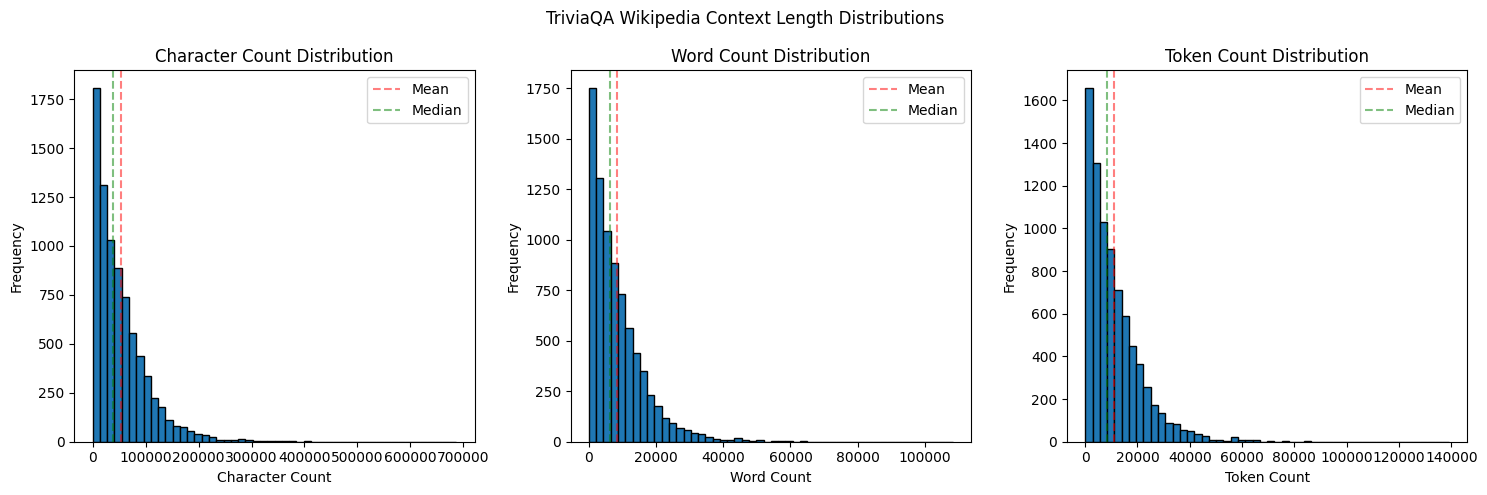

In [4]:
trivia_qa_fig = analyze_lengths(
    trivia_qa_data,
    ['entity_pages', 'wiki_context'],
    'TriviaQA Wikipedia Context'
)


Computing lengths for RepliQA Document...


100%|██████████| 17955/17955 [00:38<00:00, 470.59it/s]



Summary Statistics for RepliQA Document:

Character Count:
Mean: 6553.20
Median: 6592.00
Min: 1938
Max: 9810

Word Count:
Mean: 970.05
Median: 974.00
Min: 281
Max: 1452

Token Count:
Mean: 1250.13
Median: 1256.00
Min: 324
Max: 2003


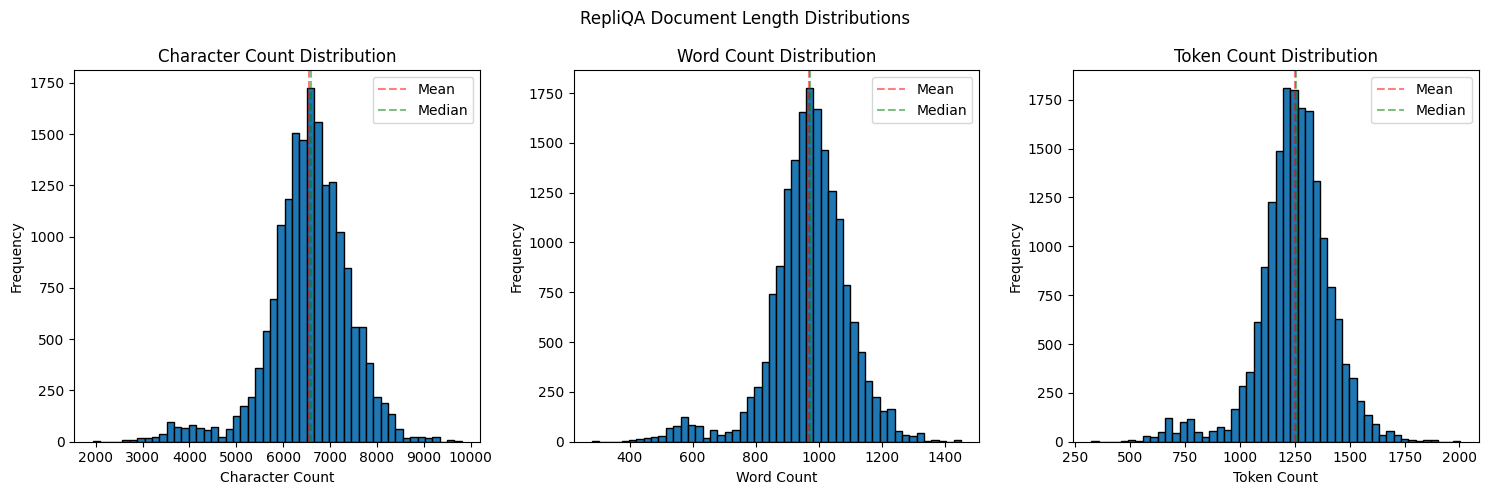

In [5]:
repliqa_fig = analyze_lengths(
    repliqa_data,
    'document_extracted',
    'RepliQA Document'
)